<a href="https://colab.research.google.com/github/BatsyBoo/DS-PRAC/blob/main/PCA_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git config --global user.email "25mcs116@nith.co.in"
!git config --global user.name "B Boo"


In [ ]:
!git clone https://github.com/BatsyBoo/DS-PRAC


Cloning into 'DS-PRAC'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 317.23 KiB | 1.76 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
"""#Steps:
1.Calc mean#
2.calc covariance
3.calc eingen values n eingen vectors
4.choose principal components
5.project on principal componentss


"""

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 # Small example dataset: 6 samples, 3 features
X = np.array([
       [2.5, 2.4, 1.2],
       [0.5, 0.7, 0.3],
       [2.2, 2.9, 1.0],
       [1.9, 2.2, 0.8],
       [3.1, 3.0, 1.4],
       [2.3, 2.7, 1.1],
], dtype=float)

In [2]:
X_mean=np.sum(X, axis=0) / X.shape[0]
print(X_mean)

[2.08333333 2.31666667 0.96666667]


In [3]:
# print(X.shape[0])
vari=((X-X_mean)*(X-X_mean))/X.shape[0]
print(vari)

[[2.89351852e-02 1.15740741e-03 9.07407407e-03]
 [4.17824074e-01 4.35601852e-01 7.40740741e-02]
 [2.26851852e-03 5.67129630e-02 1.85185185e-04]
 [5.60185185e-03 2.26851852e-03 4.62962963e-03]
 [1.72268519e-01 7.78240741e-02 3.12962963e-02]
 [7.82407407e-03 2.44907407e-02 2.96296296e-03]]


In [4]:
X_centered = X - X_mean

In [5]:
var_prop = np.sum(X_centered**2, axis=0) / X.shape[0]
print('Variance:\n',var_prop)

Variance:
 [0.63472222 0.59805556 0.12222222]


In [6]:
# cov_matrix = np.cov(X_centered, rowvar=False)
cov_matrix = (X_centered.T @ X_centered) /X.shape[0]
print("cov_matrix\n",cov_matrix)


cov_matrix
 [[0.63472222 0.57694444 0.27611111]
 [0.57694444 0.59805556 0.24722222]
 [0.27611111 0.24722222 0.12222222]]


In [17]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigen_vals)
print("Eigenvectors (principal components):\n", eigen_vecs)

Eigenvalues:
 [1.30918334 0.04426893 0.00154773]
Eigenvectors (principal components):
 [[-0.68801271 -0.57633092 -0.44100021]
 [-0.66174677  0.74768725  0.05527187]
 [-0.29787535 -0.32985822  0.89580346]]


In [18]:
# sort eigen values
sort_eng = eigen_vals.argsort()[::-1]
eigen_vals = eigen_vals[sort_eng]
eigen_vecs = eigen_vecs[:, sort_eng]

In [19]:
print(eigen_vecs)

[[-0.68801271 -0.57633092 -0.44100021]
 [-0.66174677  0.74768725  0.05527187]
 [-0.29787535 -0.32985822  0.89580346]]


In [29]:
pc1 = eigen_vecs[:,:2]
print(pc1)

[[-0.68801271 -0.57633092]
 [-0.66174677  0.74768725]
 [-0.29787535 -0.32985822]]


In [30]:
proj_1D = X_centered @ pc1
print(proj_1D)


[[-0.41132177 -0.25479753]
 [ 2.35776097 -0.07633163]
 [-0.47621628  0.35791702]
 [ 0.25298534  0.07340686]
 [-1.28075253 -0.21795537]
 [-0.44245573  0.11776065]]


In [31]:
proj_1D=proj_1D.ravel()
print(proj_1D)

[-0.41132177 -0.25479753  2.35776097 -0.07633163 -0.47621628  0.35791702
  0.25298534  0.07340686 -1.28075253 -0.21795537 -0.44245573  0.11776065]


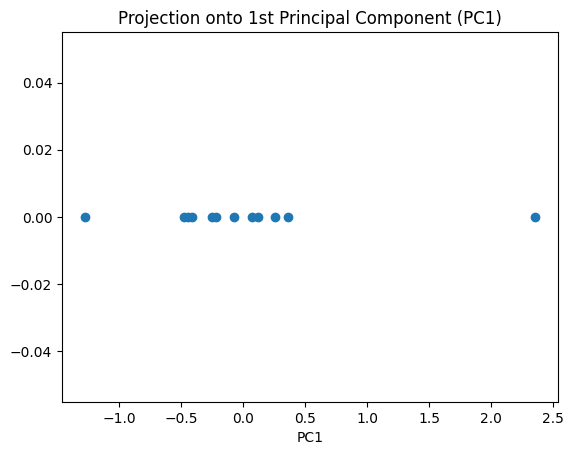

In [36]:
plt.scatter(proj_1D, np.zeros_like(proj_1D))
# for i, val in enumerate(proj_1D):
#     plt.text(val, 0, str(i))
plt.title("Projection onto 1st Principal Component (PC1)")
plt.xlabel("PC1")
plt.show()


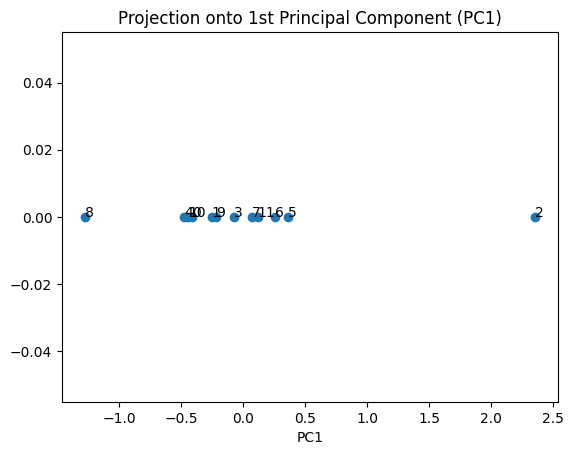

In [35]:
plt.scatter(proj_1D, np.zeros_like(proj_1D))
for i, val in enumerate(proj_1D):
    plt.text(val, 0, str(i))
plt.title("Projection onto 1st Principal Component (PC1)")
plt.xlabel("PC1")
plt.show()
